### 411 Regressão Linear Múltipla no Scikit learn
<h1>Regressão Linear Múltipla</h1><h2>O que é</h2><ul><li>Modelo estatístico para prever uma variável target (variável resposta) com base em múltiplas variáveis explicativas</li><li>Combinação de várias variáveis independentes para tentar explicar ou predizer uma variável dependente</li></ul><h2>Diferenças para Regressão Linear Simples</h2><ul><li>Ao invés de uma variável explicativa, temos várias</li><li>X_train e X_test têm várias colunas (variáveis) ao invés de apenas uma</li><li>Precisamos ter cuidado com a seleção de variáveis<ul><li>Evitar variáveis muito correlacionadas entre si</li><li>Usar métodos como backward elimination</li></ul></li></ul><h2>Etapas</h2><ul><li>Análise descritiva e exploratória dos dados</li><li>Quebrar dados em treino e teste</li><li>Treinar modelo e avaliar métricas (R2, MAE, RMSE etc)</li><li>Fazer seleção de variáveis (ex: backward elimination)</li><li>Interpretar os coeficientes</li></ul><h2>Bibliotecas</h2><ul><li>Sklearn (LinearRegression para treinar o modelo)</li><li>Statsmodels (para obter estatísticas como p-valores)</li></ul><h2>Próximos Passos</h2><ul><li>Exemplo prático no Sklearn</li><li>Análise dos resultados</li><li>Interpretação dos coeficientes</li></ul>

### 412 Regressão Linear Múltipla no Scikit learn Prática

### Regressão Linear com Scikit learn - Exercício
<h1>Previsão de preços de automóveis</h1><h2>Tema central</h2><ul><li>Desenvolvimento de um modelo de machine learning para prever preços de automóveis</li></ul><h2>Tópicos abordados</h2><h3>Objetivo</h3><ul><li>Prever preços de automóveis com base em variáveis explicativas</li></ul><h3>Dados</h3><ul><li>Variáveis explicativas sobre os automóveis<ul><li>Características técnicas</li><li>Equipamentos</li><li>Condições</li></ul></li></ul><h3>Modelagem</h3><ul><li>Aplicar técnicas de machine learning<ul><li>Regressão</li><li>Árvores de decisão</li><li>Redes neurais</li></ul></li></ul><h3>Tratamento de dados</h3><ul><li>Limpeza</li><li>Transformação de variáveis</li><li>Normalização</li><li>Codificação de variáveis categóricas</li></ul><h3>Métricas de sucesso</h3><ul><li>R2: qualidade do ajuste</li><li>MAE: erro absoluto médio</li><li>MSE: erro quadrático médio</li></ul><h3>Validação</h3><ul><li>Dividir dados em treino e teste</li><li>Avaliar métricas em ambos para verificar generalização</li></ul><h3>Entrega</h3><ul><li>Exibir métricas de sucesso<ul><li>Interpretar se modelo é bom ou ruim</li></ul></li></ul>

In [352]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [353]:
credito = pd.read_excel('Limite_Credito_Dummy.xlsx')
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [354]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [355]:
#escolaridade
le.fit(credito.Escolaridade) 
credito.Escolaridade = le.transform(credito.Escolaridade)

# gênero
le.fit(credito.Gênero) 
credito.Gênero = le.transform(credito.Gênero)

#regiao
le.fit(credito.Região) 
credito.Região = le.transform(credito.Região)

In [356]:
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,0,0,0,500
1,68,5000,5000,380,0,0,0,600
2,44,5800,5800,500,0,0,0,800
3,72,4300,4300,2000,0,0,0,1000
4,75,4400,4400,3000,0,0,0,1000


<Axes: xlabel='LimitedeCreditoImediato', ylabel='Count'>

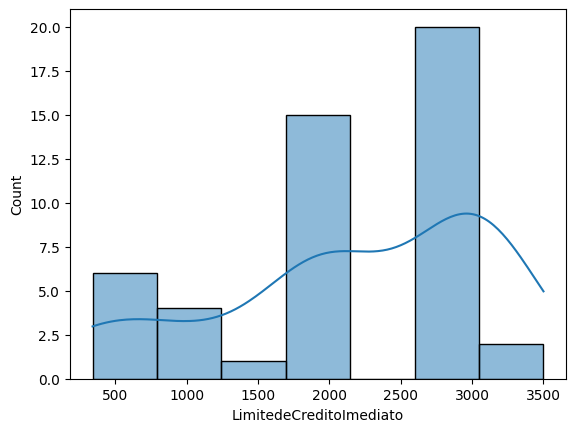

In [357]:
sns.histplot(credito, x="LimitedeCreditoImediato",kde=True)

<Axes: xlabel='Idade', ylabel='Count'>

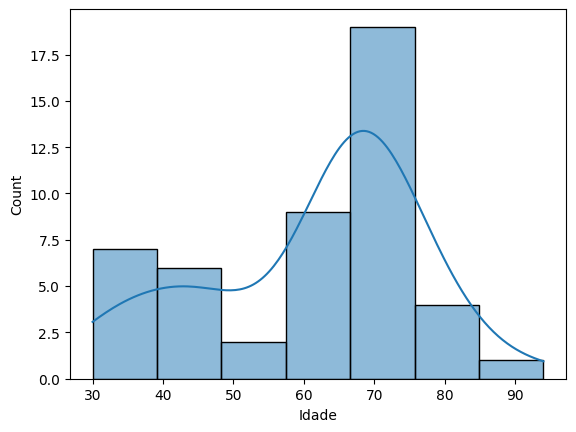

In [358]:
sns.histplot(credito, x="Idade",kde=True)

In [359]:
credito.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,0.375000,0.458333,0.500000,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,0.489246,0.503534,0.505291,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,0.000000,0.000000,0.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,0.000000,0.000000,0.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,0.000000,0.000000,0.500000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,1.000000,1.000000,1.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,1.000000,1.000000,1.000000,35000.000000


In [360]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

credito_norm= pd.DataFrame(scaler.fit_transform(credito), index=credito.index, columns=credito.columns)

In [361]:
credito_norm.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.491536,0.103978,0.128388,0.580762,0.375000,0.458333,0.500000,0.148427
std,0.238820,0.164806,0.184894,0.296865,0.489246,0.503534,0.505291,0.177736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265625,0.027119,0.038100,0.501582,0.000000,0.000000,0.000000,0.051087
50%,0.570312,0.053455,0.066828,0.525316,0.000000,0.000000,0.500000,0.088406
75%,0.625000,0.105323,0.121570,0.841772,1.000000,1.000000,1.000000,0.173913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [362]:
import statsmodels.formula.api as smf

In [363]:
function = "LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Gênero+Região"
model=smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Wed, 11 Sep 2024   Prob (F-statistic):           7.44e-17
Time:                            20:00:26   Log-Likelihood:                 67.328
No. Observations:                      48   AIC:                            -118.7
Df Residuals:                          40   BIC:                            -103.7
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [364]:
function = "LimitedoChequeEspecial~Salario+Gênero+Região-1"
model=smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.925
Model:                                OLS   Adj. R-squared (uncentered):              0.920
Method:                     Least Squares   F-statistic:                              185.0
Date:                    Wed, 11 Sep 2024   Prob (F-statistic):                    2.56e-25
Time:                            20:00:26   Log-Likelihood:                          64.573
No. Observations:                      48   AIC:                                     -123.1
Df Residuals:                          45   BIC:                                     -117.5
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [365]:
x= credito_norm[["Salario","Gênero","Região"]]

y = credito_norm['LimitedoChequeEspecial']

In [366]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

lr= LinearRegression()

lr.fit(x,y)


LinearRegression()

In [367]:
r_sqr= lr.score(x,y)
r_sqr

0.8791882143098557

In [368]:
y_pred_treino = lr.predict(x_treino)
print("MAE", metrics.mean_absolute_error(y_treino,y_pred_treino))
print("MSE", metrics.mean_squared_error(y_treino,y_pred_treino))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_treino,y_pred_treino)))

MAE 0.03535260038720454
MSE 0.0024122510423403173
RMSE 0.04911467237333786


In [369]:
y_pred_teste = lr.predict(x_teste)
print("MAE", metrics.mean_absolute_error(y_teste,y_pred_teste))
print("MSE", metrics.mean_squared_error(y_teste,y_pred_teste))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_teste,y_pred_teste)))

MAE 0.06543044287056327
MSE 0.008770831909357938
RMSE 0.09365271971148482


### 413. Regressão Linear com Scikit learn - Exercício
<h1>Previsão de preços de automóveis</h1><h2>Tema central</h2><ul><li>Desenvolvimento de um modelo de machine learning para prever preços de automóveis</li></ul><h2>Tópicos abordados</h2><h3>Objetivo</h3><ul><li>Prever preços de automóveis com base em variáveis explicativas</li></ul><h3>Dados</h3><ul><li>Variáveis explicativas sobre os automóveis<ul><li>Características técnicas</li><li>Equipamentos</li><li>Condições</li></ul></li></ul><h3>Modelagem</h3><ul><li>Aplicar técnicas de machine learning<ul><li>Regressão</li><li>Árvores de decisão</li><li>Redes neurais</li></ul></li></ul><h3>Tratamento de dados</h3><ul><li>Limpeza</li><li>Transformação de variáveis</li><li>Normalização</li><li>Codificação de variáveis categóricas</li></ul><h3>Métricas de sucesso</h3><ul><li>R2: qualidade do ajuste</li><li>MAE: erro absoluto médio</li><li>MSE: erro quadrático médio</li></ul><h3>Validação</h3><ul><li>Dividir dados em treino e teste</li><li>Avaliar métricas em ambos para verificar generalização</li></ul><h3>Entrega</h3><ul><li>Exibir métricas de sucesso<ul><li>Interpretar se modelo é bom ou ruim</li></ul></li></ul>

### 414.Regressão Linear Múltiplo com Scikit learn - Gabarito
<h1>Análise de preços de carros</h1><h2>Importação de bibliotecas</h2><ul><li>Pandas</li><li>Numpy</li><li>Seaborn</li><li>Sklearn</li></ul><h2>Importação e análise dos dados</h2><ul><li>Dataset com 205 linhas e 26 colunas</li><li>Variáveis categóricas transformadas em numéricas com Label Encoder</li><li>Normalização dos dados com MinMaxScalar</li></ul><h2>Análise exploratória</h2><ul><li>Histograma da variável target price</li><li>Histograma da variável número de portas</li></ul><h2>Modelo de Regressão Linear</h2><ul><li>Variável target: price</li><li>Eliminação de variáveis com alto p-value</li><li>Modelo final com R2 ajustado de 94%</li></ul><h2>Separação em bases de treino e teste</h2><ul><li>Test size: 20%</li><li>Erros baixos tanto no treino quando no teste</li><li>Bom desempenho do modelo nos dados de treino e teste</li></ul>

In [370]:
carro=pd.read_csv('CarPrice_Assignment.csv')
carro.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [371]:
# Verificando tamanho da base 
carro.shape

(205, 26)

In [372]:
carro.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [373]:
# transformando com Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# nome do carro
le.fit(carro.CarName)
carro.CarName = le.transform(carro.CarName)

# nome do combustivel
le.fit(carro.fueltype)
carro.fueltype = le.transform(carro.fueltype)

# aspiration
le.fit(carro.aspiration)
carro.aspiration= le.transform(carro.aspiration)

# numero de portas
le.fit(carro.doornumber)
carro.doornumber= le.transform(carro.doornumber)

# carroceria
le.fit(carro.carbody)
carro.carbody = le.transform(carro.carbody)

# roda
le.fit(carro.drivewheel)
carro.drivewheel= le.transform(carro.drivewheel)

# Engine location
le.fit(carro.enginelocation)
carro.enginelocation = le.transform(carro.enginelocation)

# enginetype
le.fit(carro.enginetype)
carro.enginetype = le.transform(carro.enginetype)

# numero de cilindro
le.fit(carro.cylindernumber)
carro.cylindernumber = le.transform(carro.cylindernumber)

# fuelsystem
le.fit(carro.fuelsystem)
carro.fuelsystem = le.transform(carro.fuelsystem)

In [374]:
carro.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


<Axes: xlabel='price', ylabel='Count'>

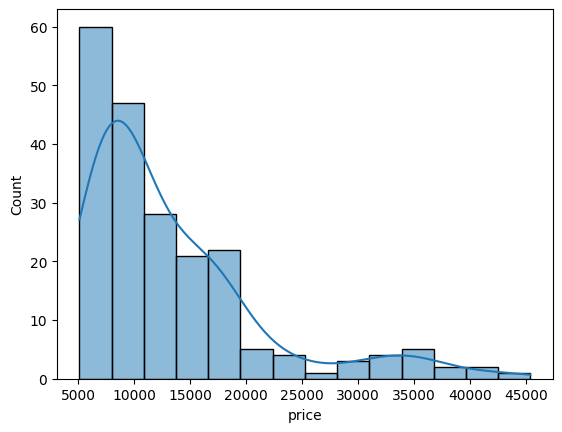

In [375]:
sns.histplot(carro, x='price',kde=True)

<Axes: xlabel='doornumber', ylabel='Count'>

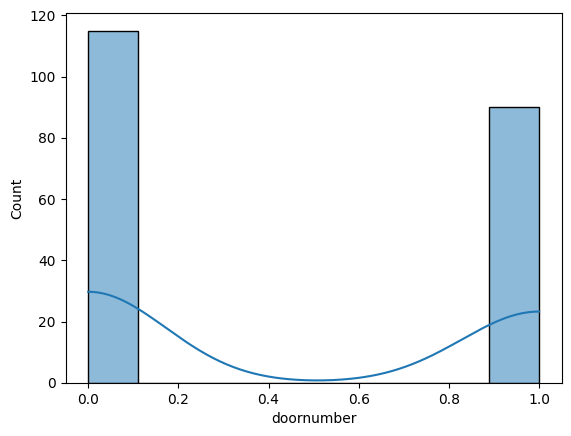

In [376]:
sns.histplot(carro, x='doornumber',kde=True)

In [377]:
# normalizando os dados com MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

carro_norm = pd.DataFrame(scaler.fit_transform(carro), index=carro.index, columns=carro.columns )

In [378]:
carro_norm.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.000000,0.333333,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.000000,0.333333,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,0.449254,0.433333,0.383333,0.517843,0.833333,0.500000,0.343396,0.714286,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,0.529851,0.491667,0.541667,0.329325,0.500000,0.333333,0.181132,0.714286,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,0.529851,0.508333,0.541667,0.518231,0.500000,0.166667,0.283019,0.714286,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [379]:
carro_norm.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [380]:
import statsmodels.formula.api as smf

In [381]:
function = 'price~CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm-1'
model=smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              272.1
Date:                Wed, 11 Sep 2024   Prob (F-statistic):                   5.21e-116
Time:                        20:00:27   Log-Likelihood:                          271.87
No. Observations:                 205   AIC:                                     -517.7
Df Residuals:                     192   BIC:                                     -474.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [382]:
x= carro_norm[['CarName','doornumber','carbody','drivewheel','enginelocation','carwidth','carheight','curbweight','enginesize','stroke','compressionratio','horsepower','peakrpm']]
y= carro_norm[['price']]

In [383]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=0)

lr= LinearRegression()

lr.fit(x,y)

LinearRegression()

In [384]:
r=lr.score(x,y)
print(r)

0.8957104217461449


In [385]:
y_pred_treino = lr.predict(x_treino)
print("MAE", metrics.mean_absolute_error(y_treino,y_pred_treino))
print("MSE", metrics.mean_squared_error(y_treino,y_pred_treino))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_treino,y_pred_treino)))

MAE 0.04569363700185785
MSE 0.0034652202243886775
RMSE 0.058866121193677075


In [386]:
y_pred_teste = lr.predict(x_teste)
print("MAE", metrics.mean_absolute_error(y_teste,y_pred_teste))
print("MSE", metrics.mean_squared_error(y_teste,y_pred_teste))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_teste,y_pred_teste)))

MAE 0.05648134537691529
MSE 0.0065486939896333965
RMSE 0.08092400131996315
